<H1> Photo descriptions</H1/
---

In [58]:
# Inspired on https://medium.com/@wenxuan0923/feature-extraction-from-text-using-countvectorizer-tfidfvectorizer-9f74f38f86cc
# https://medium.com/@kartheek_akella/implementing-the-tf-idf-search-engine-5e9a42b1d30b
# Imports
# TfidfVectorizer 
# CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# set of documents
Docs= ["That’s me having fun in the photo booth! Fun in a raining day.",
       "When the water is outside… Fun is to splash the water inside the public pool.",
       "I am going to watch the season premiere.",
      "This summer we went to Puglia, we swimed in cristal water",
      "A vacation is what you take when you can no longer take what you’ve been taking.",
      "My favorite place to vacation is anyplace by the water.",
      "Isn’t it amazing how much stuff we get done the day before vacation?",
      "Take vacations, go as many places as you can, you can always make money, you can’t awakes make memories.",
      "Happiness consists of living each day as if it were the first day of your honeymoon and the last day of your vacation.",
      "When the midsummer vacation arrived, he was preparing to set out with his family to Fox How in Westmoreland, where he had purchased some property and built a house.",
      "She liked the sharp salty smell of the water, and the vastness of the horizon bounded only by the blue sky above."]

In [72]:
vectorizer = TfidfVectorizer()

In [73]:
# Counting occurences
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

count_wm = countvectorizer.fit_transform(Docs)


countDocuments = pd.DataFrame(count_wm.toarray(), 
            index=['doc'+str(i) 
                   for i in range(1, 1+len(Docs))],
            columns=countvectorizer.get_feature_names())
countDocuments

,amazing,anyplace,arrived,awakes,blue,booth,bounded,built,consists,cristal,...,swimed,taking,vacation,vacations,vastness,ve,watch,water,went,westmoreland
doc1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
doc4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
doc5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
doc6,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
doc7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
doc8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc9,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
doc10,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [74]:
#Computing tf_Idf
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
tfidf_wm = tfidfvectorizer.fit_transform(Docs)
idx=['doc'+str(i) for i in range(1, 1+len(Docs))]
tfidfDocuments =pd.DataFrame(tfidf_wm.toarray(), 
            index=idx,
            columns=tfidfvectorizer.get_feature_names())

tfidfDocuments

,amazing,anyplace,arrived,awakes,blue,booth,bounded,built,consists,cristal,...,swimed,taking,vacation,vacations,vastness,ve,watch,water,went,westmoreland
doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.365452,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.489437,0.000000,0.000000
doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428302,...,0.428302,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.287728,0.428302,0.000000
doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.544911,0.330478,0.000000,0.000000,0.544911,0.0,0.000000,0.000000,0.000000
doc6,0.000000,0.511704,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.310338,0.000000,0.000000,0.000000,0.0,0.343756,0.000000,0.000000
doc7,0.504247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.305816,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
doc8,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
doc9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.325239,0.000000,...,0.000000,0.000000,0.197251,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
doc10,0.000000,0.000000,0.296593,0.000000,0.000000,0.000000,0.000000,0.296593,0.000000,0.000000,...,0.000000,0.000000,0.179878,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.296593


In [75]:
# Query
import numpy
query = "water fun"
query_vec = tfidfvectorizer.transform([query])
queryDisplay=[tfidfvectorizer.get_feature_names(),query_vec.toarray()[0]]
pd.DataFrame(queryDisplay)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,amazing,anyplace,arrived,awakes,blue,booth,bounded,built,consists,cristal,...,swimed,taking,vacation,vacations,vastness,ve,watch,water,went,westmoreland
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617928,0.0,0.0


In [76]:
import operator
results=cosine_similarity(tfidf_wm,query_vec)

results_sorted = pd.DataFrame(results, index=idx, columns=['score'] )

results_sorted.sort_values(by=['score'], ascending=False)

,score
doc2,0.547249
doc1,0.491200
doc6,0.212417
doc4,0.177795
doc11,0.135028
doc3,0.000000
doc5,0.000000
doc7,0.000000
doc8,0.000000
doc9,0.000000


In [77]:
# Determine the number of relevant documents
num_Relevant=results_sorted.loc[results_sorted['score'] > 0].size
num_Relevant

5

In [78]:
# compute Recall
recall=[]
for k in range(1,len(results_sorted.index)+1):
    val = k
    if k > num_Relevant: val = num_Relevant
    recall.append(val/num_Relevant)
recall    

[0.2, 0.4, 0.6, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

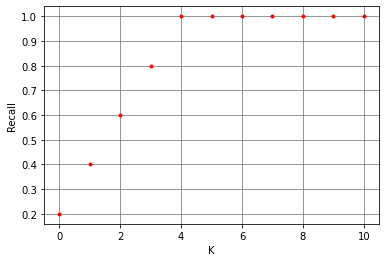

In [79]:
plt.plot(recall,'r.')
plt.grid(color='gray', linestyle='-')
plt.ylabel('Recall')
plt.xlabel('K')
plt.show()

In [80]:
# compute Precision
precision=[]
for Nret in range(1,len(results_sorted.index)+1):
#for Nret in range(1,2):
    Nretrel = num_Relevant
    if Nret < num_Relevant: Nretrel = Nret
    precision.append(Nretrel/Nret)
precision    

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8333333333333334,
 0.7142857142857143,
 0.625,
 0.5555555555555556,
 0.5,
 0.45454545454545453]

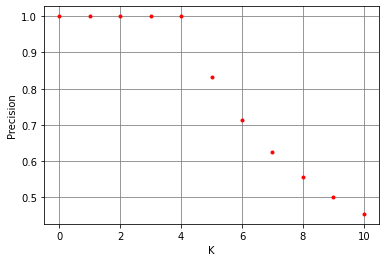

In [81]:
plt.plot(precision,'r.')
plt.grid(color='gray', linestyle='-')
plt.ylabel('Precision')
plt.xlabel('K')
plt.show()

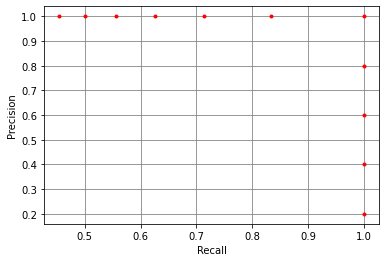

In [82]:
plt.plot(precision,recall,'r.')
plt.grid(color='gray', linestyle='-')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()